<a href="https://colab.research.google.com/github/kmilawn/phyton-ml/blob/main/Prediksi_Gangguan_Tidur_Berdasarkan_Data_Kesehatan_dan_Gaya_Hidup_Menggunakan_Model_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Gangguan Tidur Berdasarkan Data Kesehatan dan Gaya Hidup Menggunakan Model Random Forest

**Nama**        : Najwah Kamila

**NIM**         : A11.2023.15209

**Mata Kuliah** : Machine Learning

**Kelp**        : A11.4402

## 1. Pengantar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

### 1.1. Ringkasan dan Permasalahan

Gangguan tidur seperti insomnia dan sleep apnea berdampak signifikan pada kesehatan dan produktivitas seseorang. Deteksi dini sangat penting untuk mencegah komplikasi lebih lanjut. Permasalahan utama adalah bagaimana memanfaatkan data kesehatan dan gaya hidup untuk memprediksi adanya gangguan tidur.

### 1.2. Tujuan

Membangun model Machine Learning yang mampu mengklasifikasikan jenis gangguan tidur (None, Insomnia, Sleep Apnea) berdasarkan indikator gaya hidup dan kesehatan.

### 1.3. Alur Penyelesaian

1. Import dan Persiapan Data

  - Membaca dataset dari file
  - Menampilkan struktur dan informasi awal dataset

2. Exploratory Data Analysis (EDA)

  - Menjelajahi distribusi data
  - Memahami relasi antar fitur
  - Visualisasi korelasi dan outlier

3. Preprocessing

  - Encode kolom kategorikal (Gender, Occupation, BMI, Sleep Disorder)
  - Pisahkan fitur dan target
  - Normalisasi fitur numerik dengan StandardScaler
  - Pembagian Data Latih dan Uji

4. Modeling

  - Melatih model Random Forest Classifier
  - Menggunakan data training untuk pelatihan
  - Prediksi pada data testing

5. Evaluasi Model

  - Menggunakan classification report dan confusion matrix
  - Menampilkan feature importance

6. Diskusi dan Kesimpulan

  - Interpretasi performa model
  - Insight fitur penting
  - Rekomendasi pemanfaatan model

7. **Implementasi Interaktif**

  - Buat antarmuka prediksi menggunakan `ipywidgets`
  - Terima input pengguna dan prediksi gangguan tidur secara real-time



### 1.4. Penjelasan Dataset

| No | Kolom                     | Tipe Data | Deskripsi                                                        |
| -- | ------------------------- | --------- | ---------------------------------------------------------------- |
| 1  | `Person ID`               | int64     | ID unik untuk setiap individu                                    |
| 2  | `Gender`                  | object    | Jenis kelamin individu (Male / Female)                           |
| 3  | `Age`                     | int64     | Usia individu dalam tahun                                        |
| 4  | `Occupation`              | object    | Pekerjaan utama individu                                         |
| 5  | `Sleep Duration`          | float64   | Lama tidur individu per hari dalam jam                           |
| 6  | `Quality of Sleep`        | int64     | Skor kualitas tidur (skala 1-10, subjektif)                      |
| 7  | `Physical Activity Level` | int64     | Durasi aktivitas fisik harian dalam menit                        |
| 8  | `Stress Level`            | int64     | Skor tingkat stres (skala 1-10, subjektif)                       |
| 9  | `BMI Category`            | object    | Kategori BMI (Underweight, Normal, Overweight, Obese)            |
| 10 | `Blood Pressure`          | object    | Tekanan darah dalam format "Systolic/Diastolic" (contoh: 120/80) |
| 11 | `Heart Rate`              | int64     | Detak jantung saat istirahat (dalam bpm)                         |
| 12 | `Daily Steps`             | int64     | Jumlah langkah per hari                                          |
| 13 | `Sleep Disorder`          | object    | Jenis gangguan tidur (None, Insomnia, Sleep Apnea)               |

Link: [Kaggle Sleep Health and Lifestyle Dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data)

In [ ]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## 2. Exploratory Data Analysis

### 2.1. Struktur Data

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


### 2.2. Mengecek Missing Values

In [ ]:
print("Missing values per kolom:")
print(df.isnull().sum())

Missing values per kolom:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


### 2.3. Distribusi Variabel Target

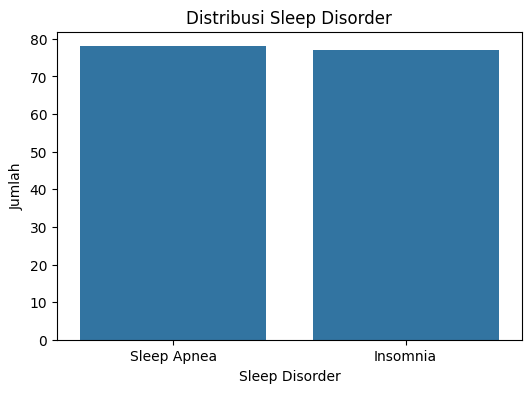

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sleep Disorder', data=df)
plt.title('Distribusi Sleep Disorder')
plt.ylabel('Jumlah')
plt.show()

### 2.4. Hubungan Gender dengan Sleep Disorder

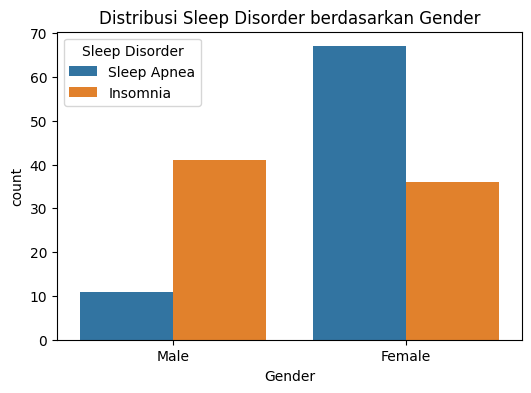

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Sleep Disorder', data=df)
plt.title('Distribusi Sleep Disorder berdasarkan Gender')
plt.show()

### 2.5. Korelasi Fitur Numerik

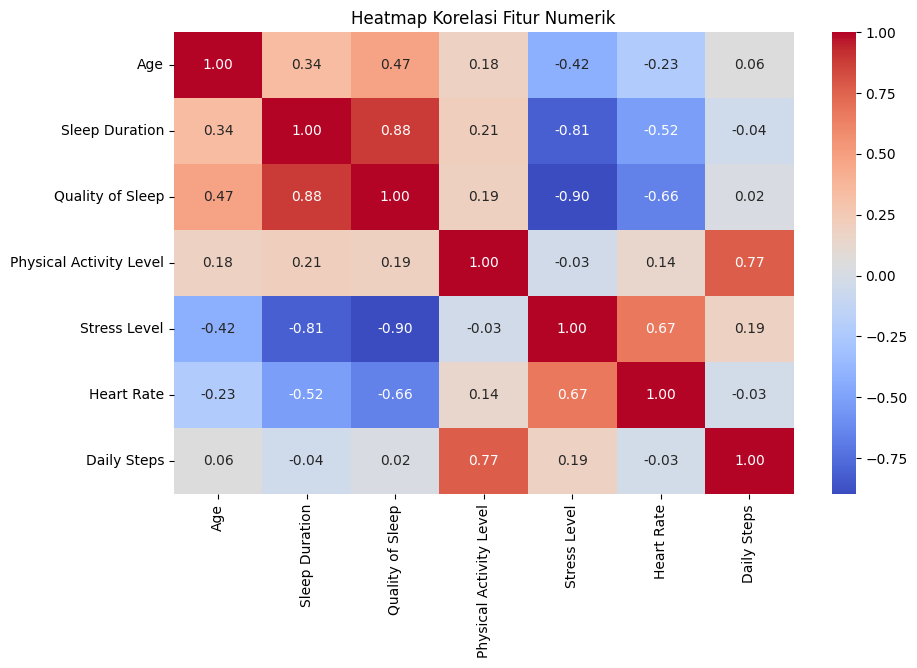

In [ ]:
numerik = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Person ID'])

plt.figure(figsize=(10,6))
sns.heatmap(numerik.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

## 3. Preprocessing

In [ ]:
data = df.copy()

### 3.1. Memisahkan Data Tekanan Darah

In [ ]:
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)
data.drop(columns='Blood Pressure', inplace=True)

### 3.2. Label Encoding

In [ ]:
# Inisialisasi label encoding
label_encoder = LabelEncoder()

# Menerapkan label encoding
data['Gender'] = label_encoder.fit_transform(data['Gender'])                  # Male = 1, Female = 0
data['Occupation'] = label_encoder.fit_transform(data['Occupation'])          # Jadi angka integer
data['BMI Category'] = label_encoder.fit_transform(data['BMI Category'])      # Misal: Underweight = 2, Normal = 1, Overweight = 0
data['Sleep Disorder'] = label_encoder.fit_transform(data['Sleep Disorder'])  # Target: None = 0, Insomnia = 1, Sleep Apnea = 2

### 3.3. Memisahkan Fitur dan Target

In [ ]:
X = data.drop(columns=['Person ID', 'Sleep Disorder'])  # Fitur
y = data['Sleep Disorder']                              # Target

### 3.4. Normalisasi Fitur Numerik

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 3.5. Membagi Data Latih dan Uji

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"X_train shape: {X_train.shape}")
print(f"y_train distribution: \n{pd.Series(y_train).value_counts()}")

X_train shape: (299, 12)
y_train distribution: 
Sleep Disorder
2    175
1     62
0     62
Name: count, dtype: int64


## 4. Pemodelan

### 4.1 Melatih dan Prediksi Model

In [ ]:
# Membangun model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'  # Mengatasi data tidak seimbang
)

# Melatih model
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

### 4.2. Evaluasi Performa Model

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.88      0.88      0.88        16
           2       0.98      0.95      0.97        44

    accuracy                           0.93        75
   macro avg       0.91      0.92      0.91        75
weighted avg       0.93      0.93      0.93        75



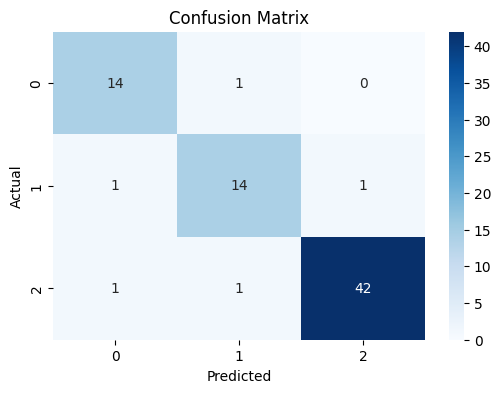

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 4.3. Fitur Penting pada Model

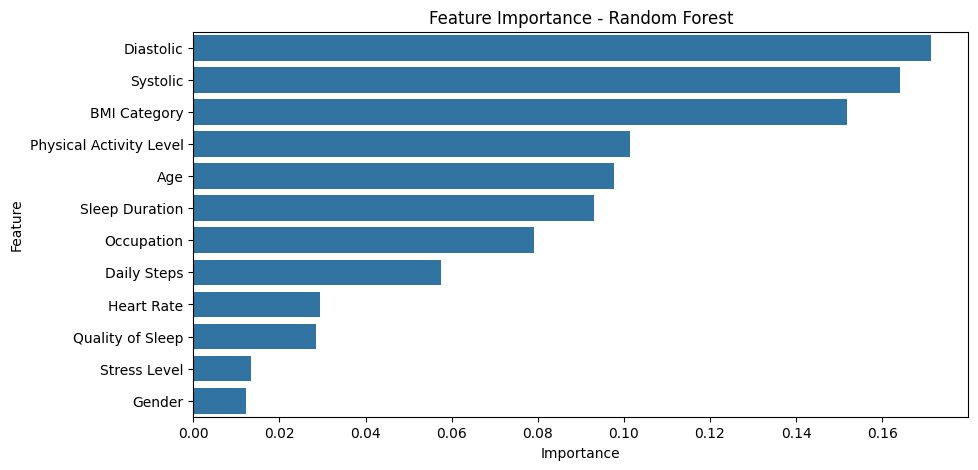

In [ ]:
importances = model.feature_importances_
feature_names = X.columns

feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importance - Random Forest")
plt.show()

## 5. Hasil dan Kesimpulan

### 5.1. Diskusi Hasil

Berdasarkan hasil evaluasi model:

- **Akurasi model mencapai 93%**, menunjukkan performa yang sangat baik dalam membedakan tiga kelas gangguan tidur: None, Insomnia, dan Sleep Apnea.
- **Confusion matrix** menunjukkan bahwa sebagian besar prediksi model sesuai dengan nilai aktual. Kelas **Sleep Apnea** diprediksi dengan sangat akurat, sedangkan **Insomnia** memiliki sedikit kesalahan klasifikasi ke kelas lain.
- **Classification report** memperlihatkan bahwa precision dan recall cukup merata, dengan nilai f1-score berkisar antara 0.88 hingga 0.97.
- **Feature importance** mengungkap bahwa fitur yang paling berpengaruh terhadap prediksi adalah:

  - **Tekanan darah (Systolic dan Diastolic)**
  - **BMI Category**
  - **Physical Activity Level**
  - **Sleep Duration**
  - Fitur seperti **Stress Level** dan **Quality of Sleep**, meskipun penting secara klinis, memiliki kontribusi yang lebih rendah menurut model.


### 5.2. Kesimpulan

- Model **Random Forest** sangat efektif dalam memprediksi jenis gangguan tidur berdasarkan data gaya hidup dan kesehatan.
- **Fitur tekanan darah dan BMI** dapat dijadikan indikator awal dalam mendeteksi potensi gangguan tidur.
- Proyek ini menunjukkan bahwa **data sederhana yang dikumpulkan secara rutin** dapat dimanfaatkan untuk skrining awal sebelum seseorang menjalani pemeriksaan klinis lebih lanjut.
- **Model ini cocok diterapkan dalam sistem kesehatan digital atau aplikasi wellness** sebagai alat bantu diagnostik non-invasif.

In [ ]:
# Widget input pengguna
gender = widgets.Dropdown(options=['Male', 'Female'], description='Gender:')
age = widgets.IntSlider(min=18, max=100, value=30, description='Age:')
occupation = widgets.Text(value='Software Engineer', description='Occupation:')
sleep_duration = widgets.FloatSlider(min=0, max=12, step=0.1, value=7, description='Sleep (hrs):')
quality_sleep = widgets.IntSlider(min=1, max=10, value=6, description='Quality:')
activity = widgets.IntSlider(min=0, max=300, value=60, description='Activity (min):')
stress = widgets.IntSlider(min=1, max=10, value=5, description='Stress:')
bmi_category = widgets.Dropdown(options=['Underweight', 'Normal', 'Overweight', 'Obese'], description='BMI:')
systolic = widgets.IntSlider(min=80, max=200, value=120, description='Systolic:')
diastolic = widgets.IntSlider(min=50, max=150, value=80, description='Diastolic:')
heart_rate = widgets.IntSlider(min=40, max=120, value=70, description='Heart Rate:')
daily_steps = widgets.IntSlider(min=0, max=30000, value=5000, step=500, description='Steps:')

button = widgets.Button(description='Predict Sleep Disorder')
output = widgets.Output()

# Label encoders yang sama seperti saat training
def encode_inputs():
    gender_map = {'Male': 1, 'Female': 0}
    bmi_map = {'Underweight': 2, 'Normal': 1, 'Overweight': 0, 'Obese': 3}
    return [
        gender_map[gender.value],
        age.value,
        0,  # occupation encoded as 0 (dummy) - should match train encoding
        sleep_duration.value,
        quality_sleep.value,
        activity.value,
        stress.value,
        bmi_map[bmi_category.value],
        systolic.value,
        diastolic.value,
        heart_rate.value,
        daily_steps.value
    ]

# Fungsi prediksi
def on_button_clicked(b):
    with output:
        clear_output()
        user_input_list = encode_inputs()

        # Buat DataFrame dengan nama kolom yang sama seperti saat training
        input_df = pd.DataFrame([user_input_list], columns=X.columns)

        # Scaling
        input_scaled = scaler.transform(input_df)

        # Prediksi
        prediction = model.predict(input_scaled)[0]
        label_map = {0: 'None', 1: 'Insomnia', 2: 'Sleep Apnea'}
        print(f"Prediksi Gangguan Tidur: {label_map[prediction]}")

# Hubungkan tombol dengan fungsi
button.on_click(on_button_clicked)

# Tampilkan widget
display(widgets.VBox([
    gender, age, occupation, sleep_duration, quality_sleep,
    activity, stress, bmi_category, systolic, diastolic,
    heart_rate, daily_steps, button, output
]))